In [4]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, MultiStepLR
import numpy as np
import matplotlib.pyplot as plt
from math import *
import time
import copy


# %%
torch.set_default_tensor_type('torch.DoubleTensor')

In [7]:
dimension = 2
input_width,layer_width = dimension, 4
layer_depth = 5
epoch = 30000
import pickle
# layer_width_list = [4,40,200,300,1000,2000,3000]
nu_list = [0.01,0.1,0.5,1]


In [3]:
def plot_loss_epoch(loss_record_all, error_record_all,epoch, var_loss, var_error,layer_width):
    para = 2 * layer_width * layer_width + 6 * layer_width + 1
    fig = plt.figure()
    # Set subplots size
    fig.set_figheight(6)
    fig.set_figwidth(7)

    ax = fig.add_subplot(2, 1, 1)

    for i in range(len(nu_list)):
        ax.plot(np.arange(epoch), loss_record_all[i])
        ax.errorbar(np.arange(epoch), loss_record_all[i], yerr=var_loss[i], label='nu = {}'.format(nu_list[i]))

    ax.set_xlabel('epoch')
    ax.set_ylabel('Empirical loss')
    ax.set_title("Empirical loss for 1D Burgers' equation, para: {}, model=Vanilla".format(para))
    ax.set_yscale("log")
    ax.legend()

    ax = fig.add_subplot(2, 1, 2)
    for i in range(len(nu_list)):
        ax.plot(np.arange(epoch), error_record_all[i])
        ax.errorbar(np.arange(epoch), error_record_all[i], yerr=var_error[i], label='nu = {}'.format(nu_list[i]))

    ax.set_xlabel('epoch')
    ax.set_ylabel('Fractional error w.r.t true solution')
    ax.set_title("Fractional error w.r.t true solution, para: {},model=Vanilla".format(para))
    ax.set_yscale("log")
    ax.legend()

    plt.savefig('loss_epoch,1D, epoch = 30000, para: {}, lr = 0.0001,data_size=3000,model=Vanilla.png'.format(para))



In [1]:
def plot_loss_epoch2(loss_record_all, error_record_all,epoch, var_loss, var_error,layer_width):
    para = 2 * layer_width * layer_width + 8 * layer_width + 2
    fig = plt.figure()
    # Set subplots size
    fig.set_figheight(6)
    fig.set_figwidth(8)

    ax = fig.add_subplot(1, 2, 1)
    # plot a smooth curve of loss
    ax.plot(np.arange(epoch), loss_record_all[0])
    ax.plot(np.arange(epoch), loss_record_all[1])
    ax.plot(np.arange(epoch), loss_record_all[2])
    # append error bar to the plot 
    ax.errorbar(np.arange(epoch), loss_record_all[0], yerr=var_loss[0], label='vanilla')
    ax.errorbar(np.arange(epoch), loss_record_all[1], yerr=var_loss[1], label='boundary-included')
    ax.errorbar(np.arange(epoch), loss_record_all[2], yerr=var_loss[2], label='initial-included')

    ax.set_xlabel('epoch')
    ax.set_ylabel('Empirical loss')
    ax.set_title("Empirical loss for Parameters: {}".format(para))
    ax.set_yscale("log")
    ax.legend()
    # make some gap between two subplots
    fig.subplots_adjust(wspace=0.3)

    ax = fig.add_subplot(1, 2, 2)
    # plot a smooth curve of loss
    ax.plot(np.arange(epoch), error_record_all[0])
    ax.plot(np.arange(epoch), error_record_all[1])
    ax.plot(np.arange(epoch), error_record_all[2])
    # append error bar to the plot
    ax.errorbar(np.arange(epoch), error_record_all[0], yerr=var_error[0], label='vanilla')
    ax.errorbar(np.arange(epoch), error_record_all[1], yerr=var_error[1], label='boundary-included')
    ax.errorbar(np.arange(epoch), error_record_all[2], yerr=var_error[2], label='initial-included')

    ax.set_xlabel('epoch')
    ax.set_ylabel('Fractional error w.r.t true solution')
    ax.set_title("Fractional error for Parameters: {}".format(para))
    ax.set_yscale("log")
    ax.legend()

    plt.savefig('loss_epoch,2D, epoch = 30000, Parameters: {}, lr = 0.001,data_size = 2400.png'.format(para))



In [12]:
import pickle

with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger2 transform/2D_burger_loss_record_all_100.pkl', 'rb') as f:
    a = pickle.load(f)
print(len(a))

# loss_record_all = [a[0][0],b[0][0],c[0][0],d[0][0]]
# error_record_all = [a[0][1],b[0][1],c[0][1],d[0][1]]

# loss_record_all = [a[1][0],b[1][0],c[1][0],d[1][0]]
# error_record_all = [a[1][1],b[1][1],c[1][1],d[1][1]]

2


In [13]:
loss_record_all = a[0]
error_record_all = a[1]
avg_loss_record = []
avg_error_record = []

var_error_record = []
var_loss_record = []
for i in range(len(loss_record_all)):
    avg_loss_record.append(np.mean(loss_record_all[i], axis=0))
    avg_error_record.append(np.mean(error_record_all[i], axis=0))
    var_error_record.append(np.var(error_record_all[i], axis=0))
    var_loss_record.append(np.var(loss_record_all[i], axis=0))


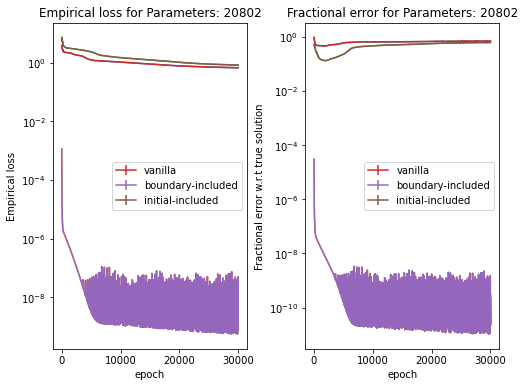

In [14]:
plot_loss_epoch2(avg_loss_record, avg_error_record, epoch,var_loss_record, var_error_record,100)